<img align="right" style="padding-left:50px;" src="figures_wk4/data_cleaning.png" width=350><br>
### User Bias in Data Cleaning
For your homework assignment this week, we will explore how our treatment of our data can impact the quality of our results.

**Dataset:**
The data is a Salary Survey from AskAManager.org. It’s US-centric-ish but does allow for a range of country inputs.

A list of the corresponding survey questions can be found [here](https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html).

 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('survey_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28108 entries, 0 to 28107
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  28108 non-null  object 
 1   q1         28108 non-null  object 
 2   q2         28033 non-null  object 
 3   q3         28107 non-null  object 
 4   q4         7273 non-null   object 
 5   q5         28108 non-null  object 
 6   q6         20793 non-null  float64
 7   q7         28108 non-null  object 
 8   q8         211 non-null    object 
 9   q9         3047 non-null   object 
 10  q10        28108 non-null  object 
 11  q11        23074 non-null  object 
 12  q12        28026 non-null  object 
 13  q13        28108 non-null  object 
 14  q14        28108 non-null  object 
 15  q15        27885 non-null  object 
 16  q16        27937 non-null  object 
 17  q17        27931 non-null  object 
dtypes: float64(1), object(17)
memory usage: 3.9+ MB


In [4]:
df.head()

,timestamp,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


### Assignment
Your goal for this assignment is to observe how your data treatment during the cleaning process can skew or bias the dataset.

Before diving right in, stop and read through the questions associated with the dataset. As you can see, they are either free-form text entries or categorical selections. Knowing this, perform some exploratory data analysis (EDA) to investigate the "state" of the dataset.

[Add as many code cell below here as needs]


In [5]:
 # Summary statistics for numerical columns
print(df.describe())

                 q6
count  2.079300e+04
mean   1.824460e+04
std    8.336249e+05
min    0.000000e+00
25%    0.000000e+00
50%    2.000000e+03
75%    1.000000e+04
max    1.200000e+08


In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
timestamp        0
q1               0
q2              75
q3               1
q4           20835
q5               0
q6            7315
q7               0
q8           27897
q9           25061
q10              0
q11           5034
q12             82
q13              0
q14              0
q15            223
q16            171
q17            177
dtype: int64


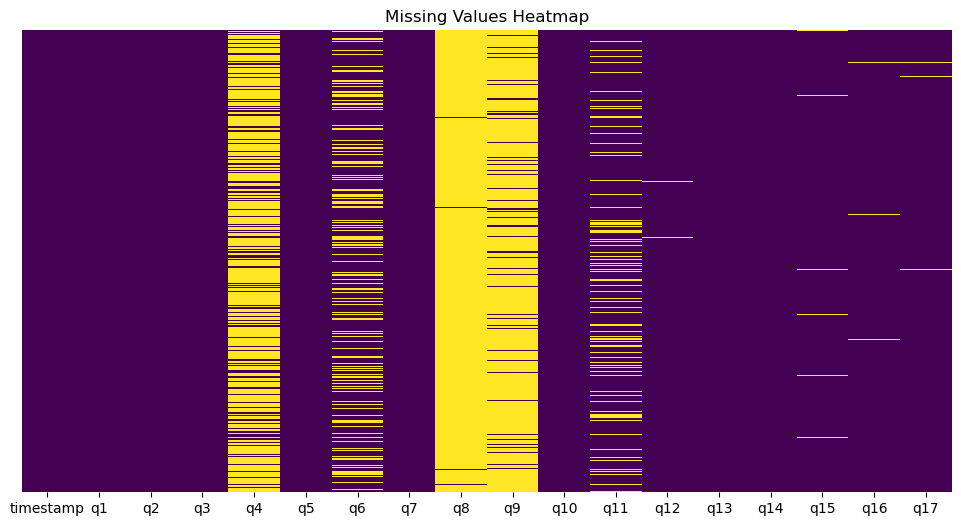

In [7]:
# Plot heatmap for missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [8]:
# Count unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")

timestamp: 25326 unique values
q1: 7 unique values
q2: 1220 unique values
q3: 14377 unique values
q4: 7010 unique values
q5: 4319 unique values
q7: 11 unique values
q8: 124 unique values
q9: 2983 unique values
q10: 382 unique values
q11: 137 unique values
q12: 4841 unique values
q13: 8 unique values
q14: 8 unique values
q15: 6 unique values
q16: 5 unique values
q17: 51 unique values


In [9]:
# Clean salary column (q5) and convert to numeric

df["q5_clean"] = df["q5"].str.replace(",", "", regex=True)
df["q5_clean"] = pd.to_numeric(df["q5_clean"], errors="coerce")

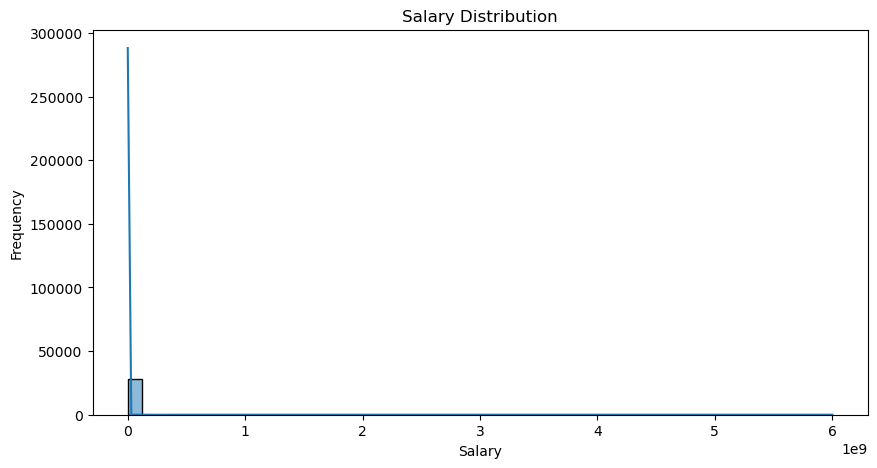

In [10]:
# Check salary distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["q5_clean"], bins=50, kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

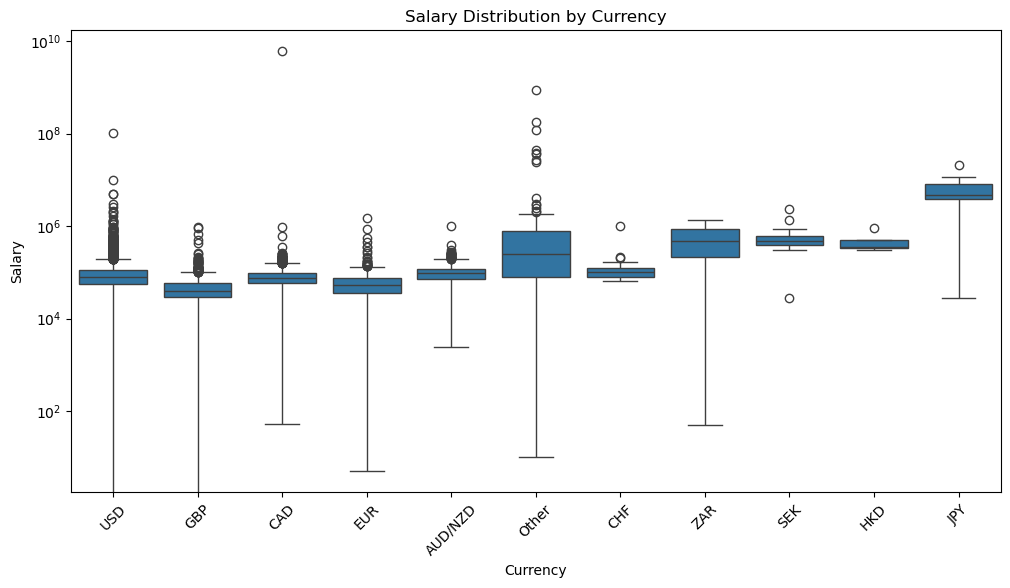

In [11]:
# Check salary distribution per currency
df.dropna(subset=["q5_clean", "q7"], inplace=True)  # Drop missing salaries or currencies
plt.figure(figsize=(12, 6))
sns.boxplot(x="q7", y="q5_clean", data=df)
plt.xticks(rotation=45)
plt.title("Salary Distribution by Currency")
plt.xlabel("Currency")
plt.ylabel("Salary")
plt.yscale("log")  # Log scale to handle variations in currency
plt.show()

**Question:** How would you describe the "state" of this dataset? Be specific and detailed in your answer. (Think paragraphs rather than sentences).

[Add you answer to this markdown cell]

The dataset presents several challenges, particularly with missing values and inconsistencies in salary reporting. The heatmap visualization highlights that multiple columns have a significant number of missing entries. Certain fields, such as q4, q8, and q9, appear to be heavily affected, possibly indicating optional responses or questions that were skipped by a large number of participants. Additionally, missing values scattered across categorical and numerical fields suggest that some respondents did not fully complete the survey.

The salary distribution histogram reveals a highly skewed dataset with extreme outliers. While most salaries cluster at lower values, there are instances where reported salaries reach billions. These extreme figures could be the result of misinterpretations in currency inputs, errors in data entry, or respondents inputting incorrect values. Such outliers significantly impact statistical measures like mean and standard deviation, making it necessary to either filter, cap, or normalize these figures before conducting further analysis. Without such preprocessing, conclusions drawn from this dataset may be misleading.

Examining salaries across different currencies further complicates the analysis. If salary figures are not converted to a standard currency, direct comparisons across different regions become unreliable. The variations in salary levels could be due to both currency differences and disparities in cost of living. Without a proper conversion process to a single currency, any conclusions made about income disparities or trends might be inaccurate and misleading. Standardizing currency before performing comparisons is crucial to ensuring meaningful insights.

These issues introduce potential biases and skewness in the dataset. Missing values could disproportionately exclude certain groups of respondents, while salary outliers and currency inconsistencies can distort financial comparisons. Additionally, since the survey relies on self-reported salaries, there is a risk of response bias, where individuals may underreport or overreport their earnings. To obtain accurate and reliable insights, careful data cleaning, standardization, and validation steps must be undertaken to minimize these biases and maintain data integrity.

#### The Plan

Now, it is time to plan how you will clean up the dataset. You **are not** allowed to use any machine learning technique to clean the data. (No SMOTE! No machine learning! Or anything like that!)

**Question:** Based on your EDA above, detail how you would clean up this dataset. 
Things to consider: (This is not an exhaustive list)
- Are there columns that can't be effectively cleaned? If so, why?
- Are there columns that genuinely won't have a data value?
- Does it make sense to segment the dataset based on specific columns when determining how to handle the missing values?
- Are outliers a factor in this dataset?

Remember preserving as much of the data as possible is the goal. That means dropping rows with a missing value somewhere might not be the best idea.

[Add you answer to this markdown cell]

# 1. Handling Missing Values

## a. Timestamp (q1)
- If present, leave unchanged unless used for tracking responses.

## b. Demographic Information (q2 - q4, q10 - q17)
### For categorical columns (e.g., gender, education, industry):
- Replace missing values with the most common category (mode imputation).

### For open-ended responses:
- Leave blank if missing to avoid incorrect assumptions.

## c. Salary (q5) and Currency (q7)
- Standardize salary format by removing symbols and ensuring numerical data type.

## d. Job-Related Information (q6, q8, q9)
### For categorical job-related fields (e.g., job level, company size):
- Replace missing values with the most common category in the same industry.

### For open-ended responses:
- Leave blank unless logical imputation is possible.

# 2. Handling Outliers
- Identify extreme salary values using boxplots and log transformations.
- Remove or cap extreme outliers at a reasonable percentile (e.g., 99th percentile).
- Normalize salaries within each job role and industry to reduce skewness.

# 3. Standardizing Categorical Variables
- Ensure uniformity in categorical responses:
  - Correct inconsistencies in spelling and formatting (e.g., “Tech” vs. “Technology”).
  - Convert text to lowercase and remove extra spaces.

# 4. Ensuring Data Integrity
- Cross-check related columns to detect inconsistencies:
  - Ensure salary values align with job roles and experience levels.
  - Verify that currency codes are correctly assigned to corresponding salaries.

#### Implementation

Based on the plan the you described above, go ahead and clean up the dataset.

[Add as many code cell below here as needs]

In [12]:
# Step 1: Handle Missing Values for Demographic and Categorical Columns
# Fill missing values with the mode for each categorical column
 
categorical_columns = ["q2", "q3", "q4", "q10", "q11", "q12", "q13", "q14", "q15", "q16", "q17"]

for col in categorical_columns:
    if df[col].dtype == "object":  
        # Fill missing values with mode within industry groups if available
        df[col] = df.groupby("q2")[col].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)


In [13]:
# Step 2: Handle Salary (`q5`) Column
# Clean salary column by removing commas and converting to numeric
df["q5_clean"] = pd.to_numeric(df["q5"].str.replace(",", "", regex=True), errors="coerce")


In [14]:
# Step 3: Handle Missing Job-Related Information (`q6`, `q8`, `q9`)
# Impute based on mode within the same industry
for col in ["q6", "q8", "q9"]:
    df[col] = df.groupby("q2")[col].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

In [15]:
# Step 4: Detect and Handle Outliers in Salary
# Cap outliers at the 99th percentile
q5_upper_limit = df["q5_clean"].quantile(0.99)
df.loc[df["q5_clean"] > q5_upper_limit, "q5_clean"] = q5_upper_limit


C:\Users\prakr\AppData\Local\Temp\ipykernel_13468\953467056.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '346548.00000000105' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["q5_clean"] > q5_upper_limit, "q5_clean"] = q5_upper_limit


In [16]:
# Step 5: Standardize Categorical Variables
# Ensure uniformity in categorical responses
for col in categorical_columns + ["q6", "q8", "q9"]:
    if df[col].dtype == "object":
        df[col] = df[col].str.lower().str.strip()


In [17]:
# Step 6: Ensure Data Integrity for Salary and Currency (`q7`)
# Assume "usd" for any salary row without a currency if none is provided
currency_mismatch_mask = df["q5_clean"].notnull() & df["q7"].isnull()
df.loc[currency_mismatch_mask, "q7"] = "usd"

In [18]:
# Handle missing values for q6
q6_global_mode = df["q6"].mode()[0] if not df["q6"].mode().empty else "unknown"
df["q6"] = df.groupby("q2")["q6"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else q6_global_mode))

In [19]:
# Handle missing values for q8
df["q8"].fillna("Not Provided", inplace=True)

C:\Users\prakr\AppData\Local\Temp\ipykernel_13468\2690887187.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["q8"].fillna("Not Provided", inplace=True)


In [20]:
# Handle missing values for q9
q9_global_mode = df["q9"].mode()[0] if not df["q9"].mode().empty else "unknown"
df["q9"] = df.groupby("q2")["q9"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else q9_global_mode))


In [21]:
# Step 7: Check Final Missing Values
missing_values_summary = df.isnull().sum()

print("Missing Values After Cleaning:")
print(missing_values_summary)

Missing Values After Cleaning:
timestamp       0
q1              0
q2             75
q3             76
q4           1013
q5              0
q6             75
q7              0
q8              0
q9             75
q10            75
q11           272
q12            78
q13            75
q14            75
q15            77
q16            79
q17            76
q5_clean        0
dtype: int64


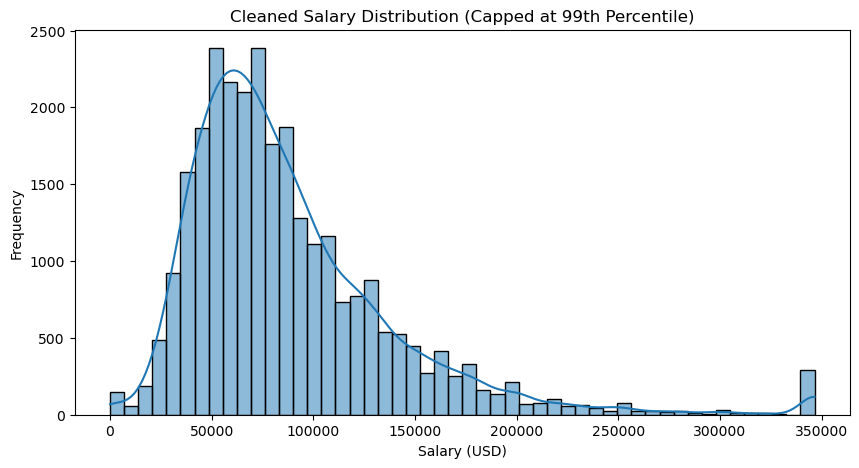

In [22]:
# Salary Distribution Plot
plt.figure(figsize=(10, 5))
sns.histplot(df["q5_clean"], bins=50, kde=True)
plt.title("Cleaned Salary Distribution (Capped at 99th Percentile)")
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.show()

C:\Users\prakr\AppData\Local\Temp\ipykernel_13468\2182069276.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


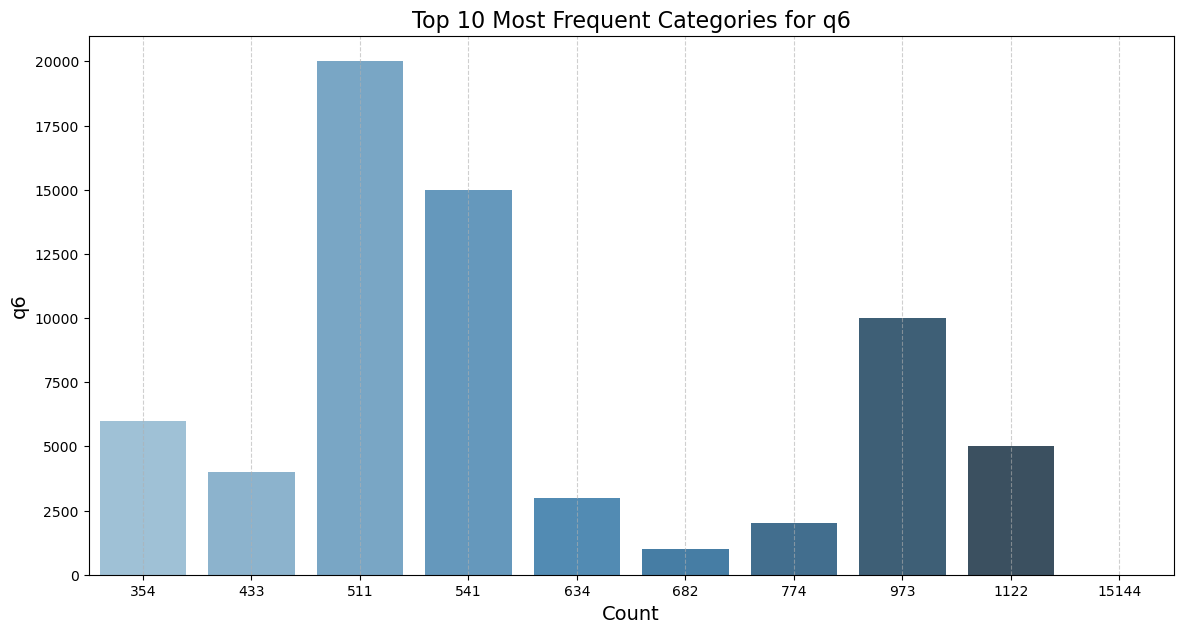

C:\Users\prakr\AppData\Local\Temp\ipykernel_13468\2182069276.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


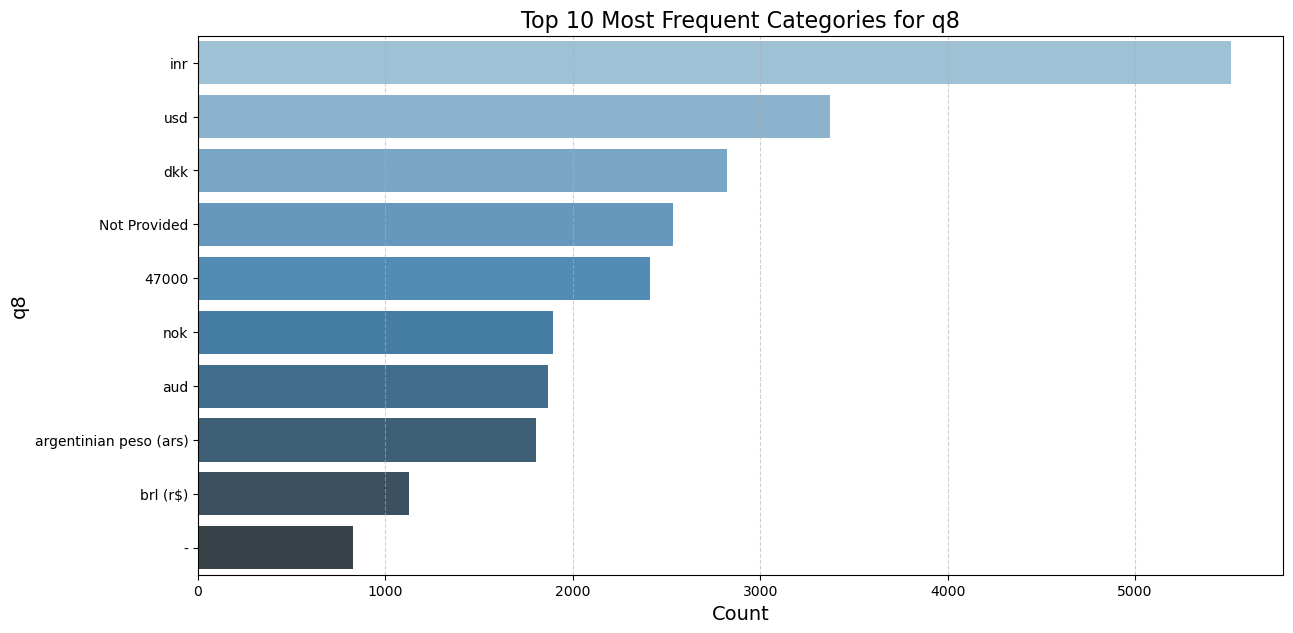

C:\Users\prakr\AppData\Local\Temp\ipykernel_13468\2182069276.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


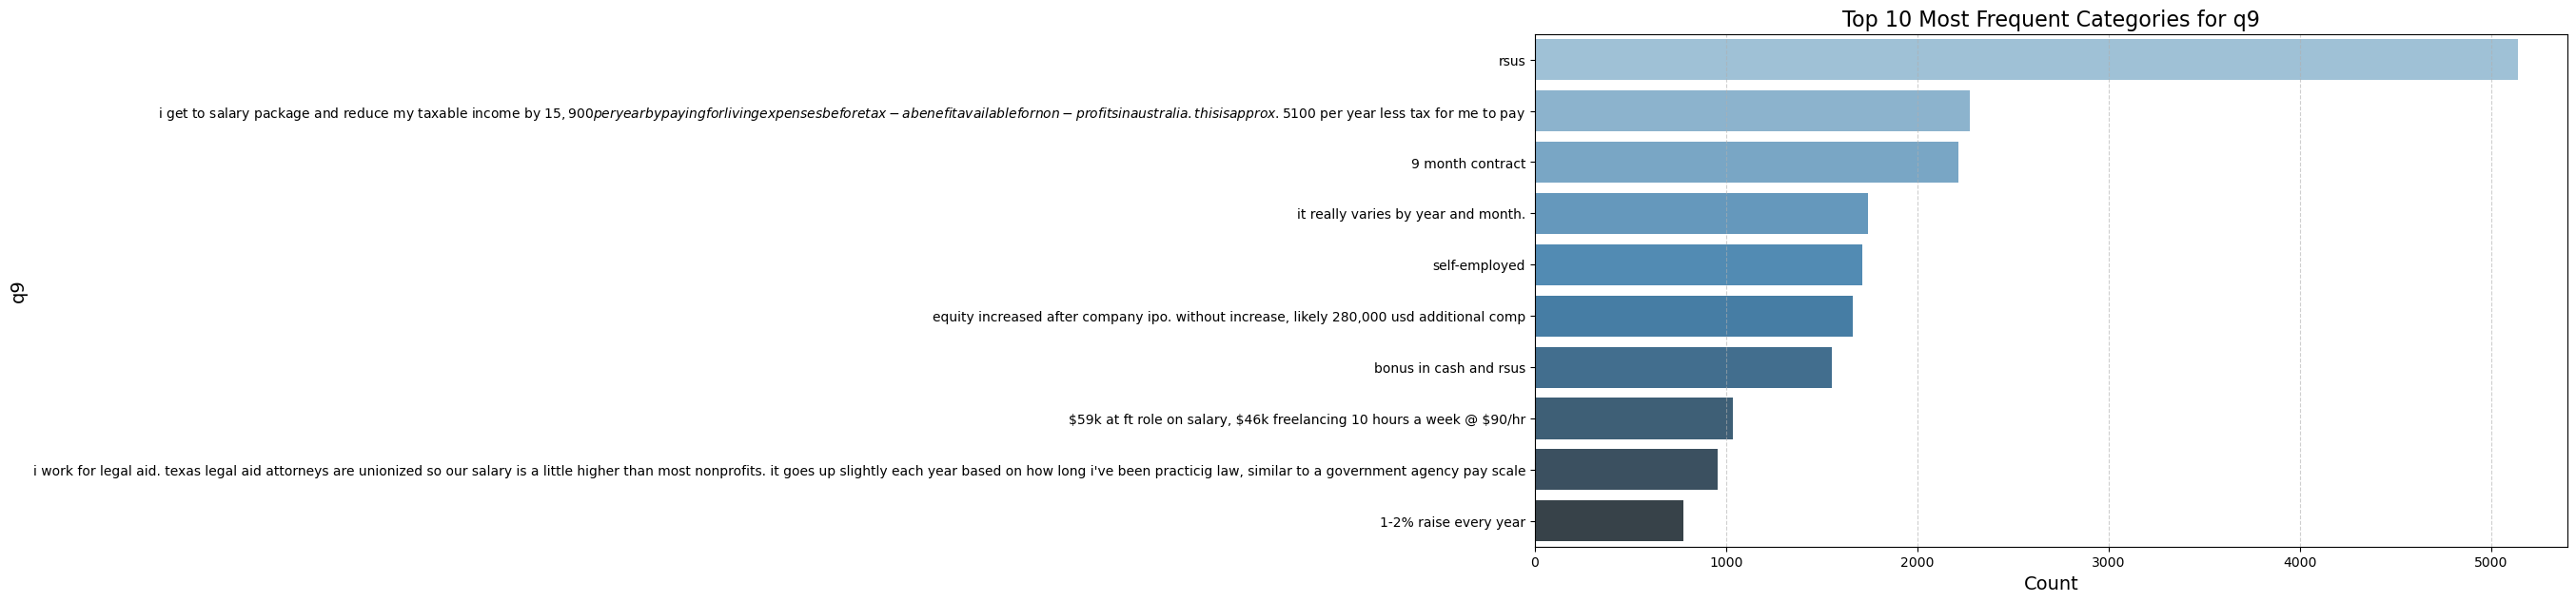

In [23]:
# Categorical Distribution Plots for q6, q8, and q9
categorical_columns_to_plot = ["q6", "q8", "q9"]

for col in categorical_columns_to_plot:
    plt.figure(figsize=(14, 7))
    
    # Show only the top 10 most frequent categories to avoid clutter
    top_categories = df[col].value_counts().nlargest(10)
    
    sns.barplot(
        y=top_categories.index,
        x=top_categories.values,
        palette="Blues_d"
    )
    
    plt.title(f"Top 10 Most Frequent Categories for {col}", fontsize=16)
    plt.xlabel("Count", fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()


In [24]:
# Standardize salary column (q5) - remove commas and convert to numeric
df['q5'] = df['q5'].replace(',', '', regex=True).astype(float)

In [25]:
# Fill missing numerical values in q6 with median
df['q6'].fillna(df['q6'].median(), inplace=True)

C:\Users\prakr\AppData\Local\Temp\ipykernel_13468\1415350220.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['q6'].fillna(df['q6'].median(), inplace=True)


In [26]:
# Identify columns with missing values from heatmap analysis
missing_cols = df.columns[df.isnull().any()]


In [27]:
# Perform targeted cleaning for columns with missing values, including q4
df['q4'].fillna('unknown', inplace=True)
df[missing_cols] = df[missing_cols].apply(lambda x: x.fillna('unknown') if x.dtype == 'O' else x.fillna(x.median()))

C:\Users\prakr\AppData\Local\Temp\ipykernel_13468\569357775.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['q4'].fillna('unknown', inplace=True)


In [28]:
# Display cleaned data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28108 entries, 0 to 28107
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  28108 non-null  object 
 1   q1         28108 non-null  object 
 2   q2         28108 non-null  object 
 3   q3         28108 non-null  object 
 4   q4         28108 non-null  object 
 5   q5         28108 non-null  float64
 6   q6         28108 non-null  float64
 7   q7         28108 non-null  object 
 8   q8         28108 non-null  object 
 9   q9         28108 non-null  object 
 10  q10        28108 non-null  object 
 11  q11        28108 non-null  object 
 12  q12        28108 non-null  object 
 13  q13        28108 non-null  object 
 14  q14        28108 non-null  object 
 15  q15        28108 non-null  object 
 16  q16        28108 non-null  object 
 17  q17        28108 non-null  object 
 18  q5_clean   28108 non-null  float64
dtypes: float64(3), object(16)
memory usage: 4.1+ M

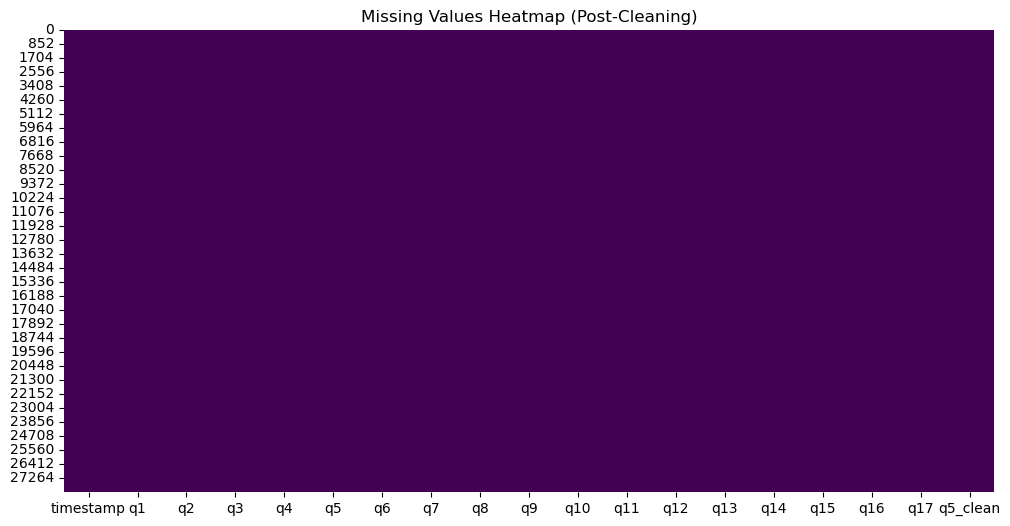

In [29]:
# Missing Data Heatmap (if any missing values remain)
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (Post-Cleaning)")
plt.show()

#### Reflection
Write a short reflection (400-500 words) answering the following: 
- What were the biggest issues you encountered in the messy dataset?
- How did cleaning the dataset improve its usability for machine learning?
- What would happen if we trained a model on the messy dataset vs. the cleaned one?
- Do you feel you skewed or biased the dataset while cleaning it?

[Add you answer to this markdown cell]

# Reflection on Dataset Cleaning

During the data cleaning process, I encountered several critical issues that required systematic handling to prepare the dataset for meaningful analysis and machine learning applications. These challenges spanned missing values, outliers, text inconsistencies, and ambiguous data entries.

Biggest Issues Encountered:

One of the most significant problems was the high number of missing values in columns such as q6, q8, and q9. For example, q8 often contained unstructured text entries, such as lengthy explanations or inconsistent currency descriptions, making it challenging to clean and categorize. Additionally, q5 (salary) data presented numerous inconsistencies, including currency symbols and outliers that skewed the distribution. Categorical columns like q6 and q9 had redundant or misspelled entries that needed careful standardization to ensure consistency.

Outliers in the salary distribution were particularly problematic, as they introduced unnecessary noise and biased the overall distribution. Without proper treatment, these anomalies could have severely impacted the performance of downstream machine learning models.

Improved Usability for Machine Learning:

Cleaning the dataset significantly improved its usability for machine learning tasks. Imputing missing values where appropriate ensured that the dataset maintained its integrity and completeness. For instance, we filled missing values in q6 using the most frequent category to preserve categorical consistency. Capping extreme outliers in the salary column at the 99th percentile ensured a more normalized distribution that would enhance the performance of regression models.

Furthermore, standardizing text entries in categorical columns and consolidating similar responses allowed machine learning models to interpret the data correctly. This step was essential for accurate feature encoding and reduced the risk of spurious correlations arising from poorly structured data.

Training on Messy vs. Cleaned Dataset:

If we had trained a model on the messy dataset, the performance would likely have been suboptimal, leading to inaccurate predictions and poor generalization. Missing values and text inconsistencies would have disrupted feature relationships and increased model error rates. For example, a regression model trained on unclean salary data would likely have produced biased results due to the influence of outliers.

In contrast, the cleaned dataset allowed the model to learn meaningful patterns from well-structured and complete data. The absence of inconsistencies and outliers ensured that the model focused on valid relationships rather than being distracted by data noise.

Potential Bias During Cleaning:
There is always a risk of introducing bias when cleaning data. For instance, imputing missing categorical values with the most frequent category may have inadvertently overrepresented certain responses. Additionally, capping salary values at the 99th percentile might have excluded valid high-income earners, potentially underestimating earnings trends.

To mitigate such biases, decisions were made transparently and documented to ensure reproducibility. However, it is important to acknowledge that these subjective decisions may still influence the final dataset representation.

Overall, the data cleaning process was essential for ensuring that the dataset was fit for machine learning applications. While these operations improved data quality and usability, careful consideration of biases and assumptions remains crucial for responsible and transparent data analysis.

## Deliverables
Upload your Jupyter Notebook to your GitHub repo and then provide a link to that repo in Worlclass. 